# **Predict Customer Clicked Ads Classification**

## EDA

###Descriptive Analysis

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df=pd.read_csv('/content/drive/MyDrive/Rakamin/Predict Customer Clicked Ads Classification by Using Machine Learning/Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [45]:
df.shape

(1000, 11)

In [46]:
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [47]:
df.duplicated().sum()

0

In [48]:
nums = df.select_dtypes(include=['int64','float64']).columns
cats = df.select_dtypes(exclude=['int64','float64']).columns

In [49]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [50]:
df[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [51]:
for col in cats:
  print ('Column', col, ':')
  print(df[col].value_counts())
  print(' ')

Column Male :
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64
 
Column Timestamp :
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64
 
Column Clicked on Ad :
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
 
Column city :
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang 

- No duplicated data.
- There are missing values in the following features:
  - Daily Time Spent on Site (13): Imputed with the median value.
  - Area Income (13): Imputed with the mean value.
  - Daily Internet Usage (11): Imputed with the median value.
  - Male (3): Imputed with the mode value.
- Changed data type Feature Timestamp to Datetime.

###Univariate Analysis

In [52]:
def plotting(plot):
  plt.figure(figsize=(10, 6))
  for i in range(0, len(nums)):
        plt.subplot(1, len(nums), i+1)
        if plot == 'box':
            sns.boxplot(y=nums[i], data=df, showfliers=True, color='skyblue')
        elif plot == 'dist':
            sns.distplot(x=df[nums[i]], color='skyblue')
        elif plot == 'violin':
            sns.violinplot(y=nums[i], data=df, color='skyblue')
        else:
            None
        plt.tight_layout()

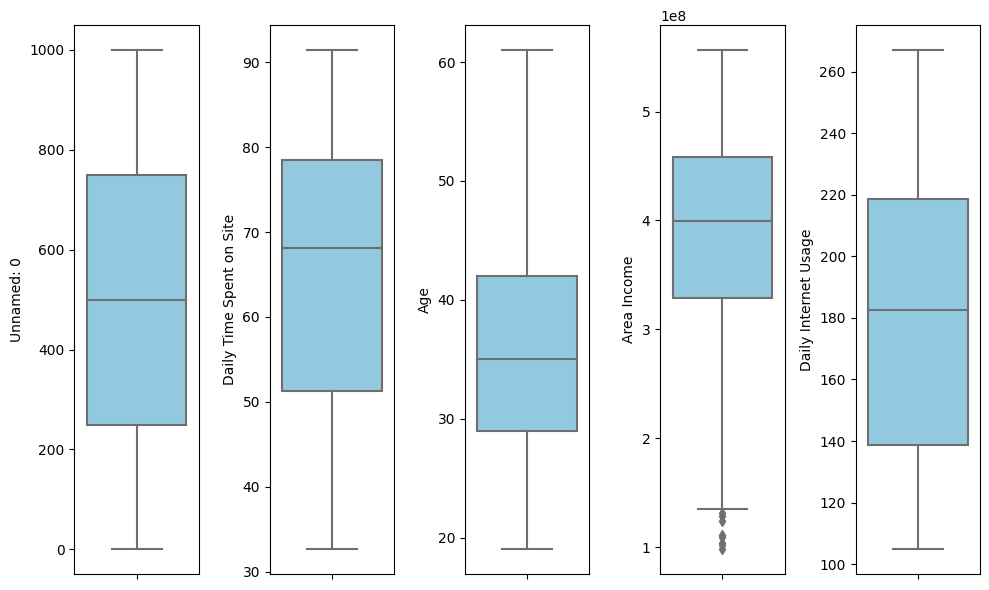

In [53]:
plotting('box')

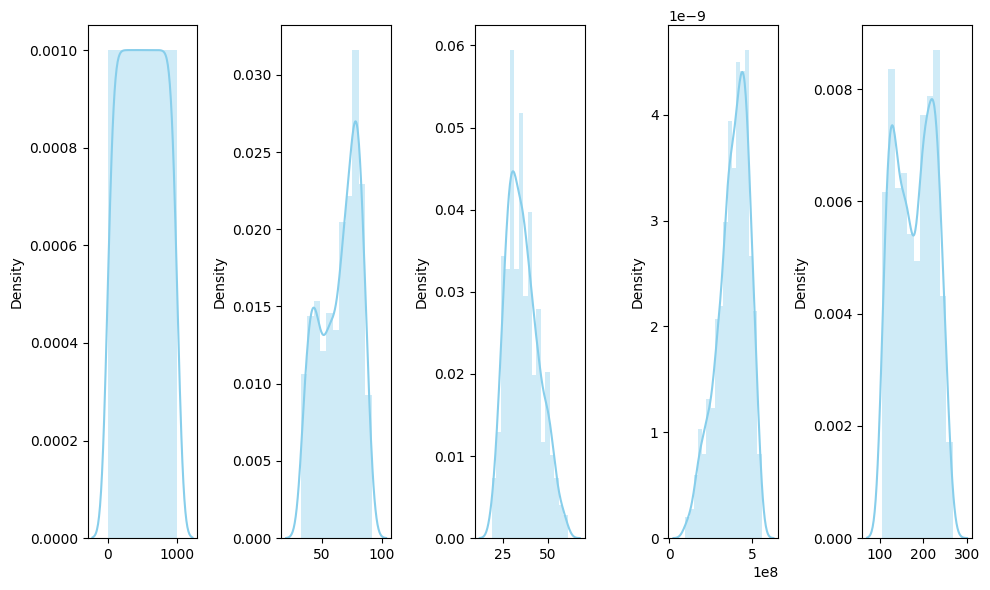

In [54]:
plotting('dist')

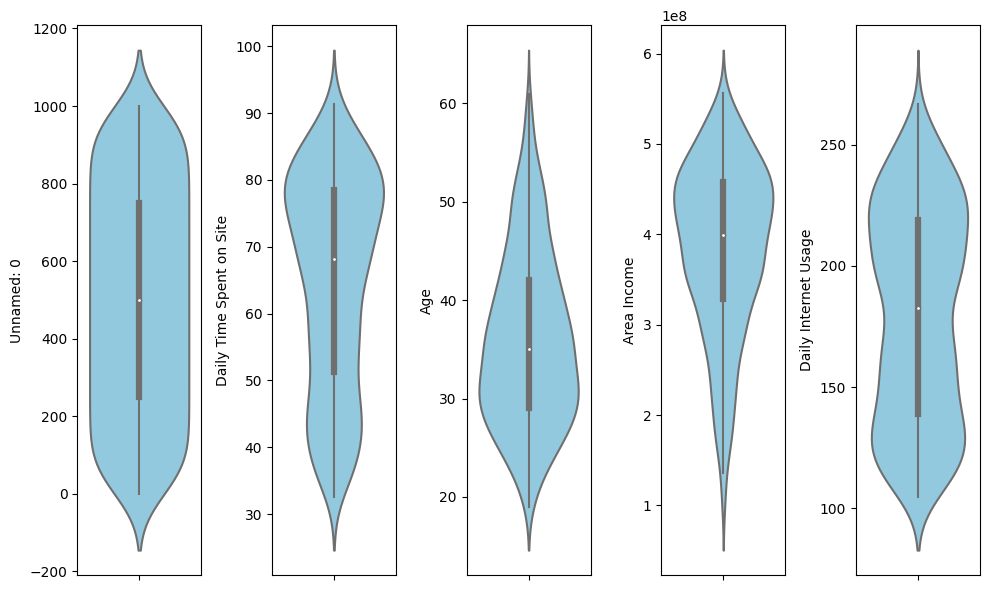

In [55]:
plotting('violin')

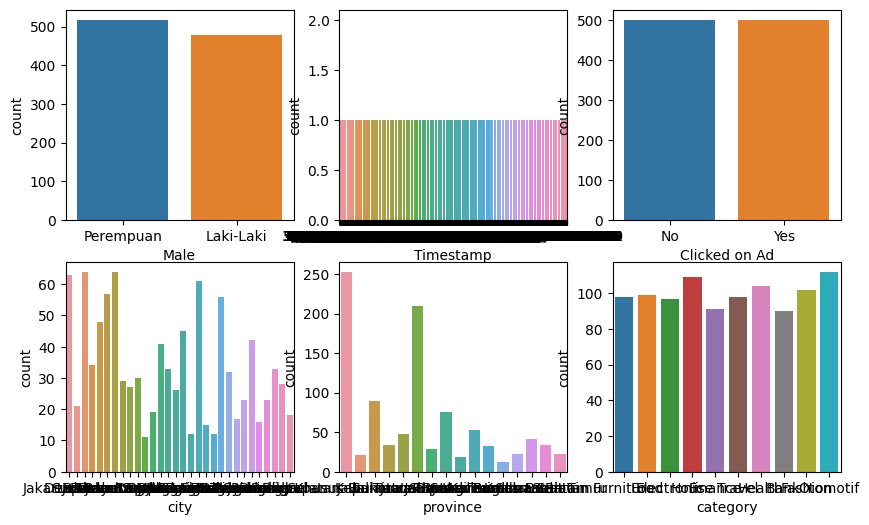

In [56]:
plt.figure(figsize = (10, 6))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x = df[cats[i]])

In [57]:
df['Clicked on Ad'].describe().T

count     1000
unique       2
top         No
freq       500
Name: Clicked on Ad, dtype: object

- There are outliers in the feature Area Income.
- The data distribution of the features Daily Internet Usage and Daily Time Spent on Site is bimodal, whereas Age has a positively skewed distribution, and Area Income has a negatively skewed distribution.
- The categorical feature that will be used as the target for this project is Clicked on Ad, where this feature has values Yes & No with equal frequencies of 500.

###Bivariate Analysis

In [58]:
feats = ['Age','Daily Time Spent on Site','Daily Internet Usage']
primary = 'skyblue'
secondary = 'orange'

def feats_plotting(plot):
    plt.figure(figsize=(10, 6))
    for i in range(0, len(feats)):
        plt.subplot(1, len(feats), i+1)
        if plot == 'box':
            sns.boxplot(y=feats[i], x='Clicked on Ad', data=df, showfliers=True, palette=[primary, secondary])
        elif plot == 'dist':
            sns.kdeplot(data=df, x=feats[i], hue='Clicked on Ad', fill=True, common_norm=False, palette=[primary, secondary])
        elif plot == 'violin':
            sns.violinplot(y=feats[i], x='Clicked on Ad', data=df, palette=[primary, secondary])
        else:
            None
        plt.tight_layout()

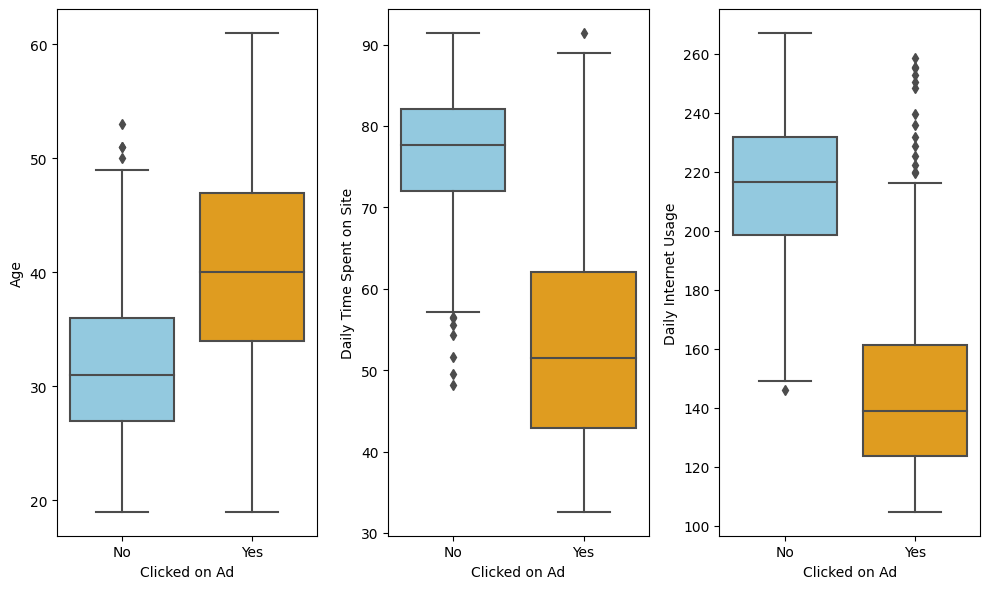

In [59]:
feats_plotting('box')

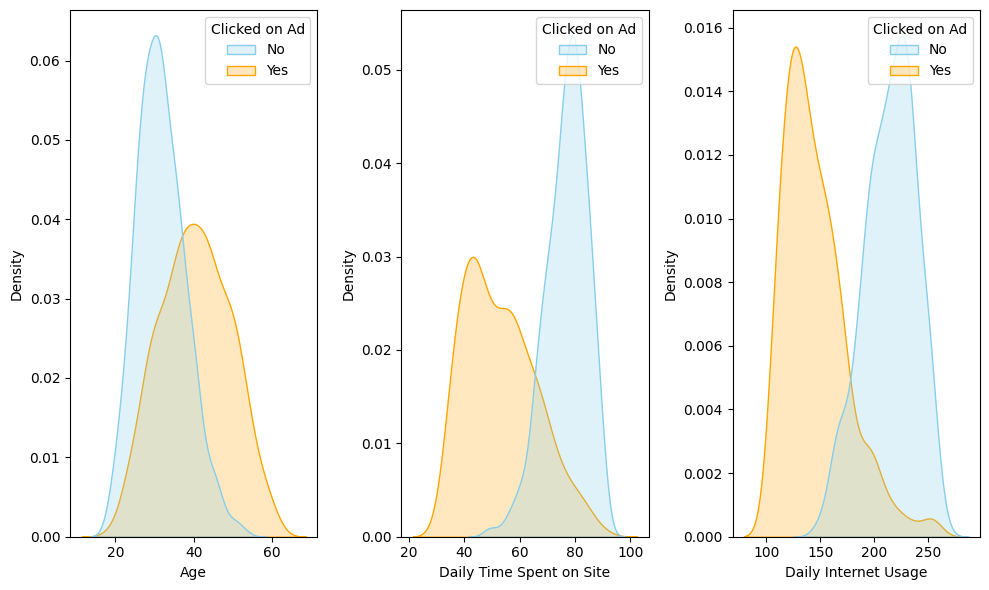

In [60]:
feats_plotting('dist')

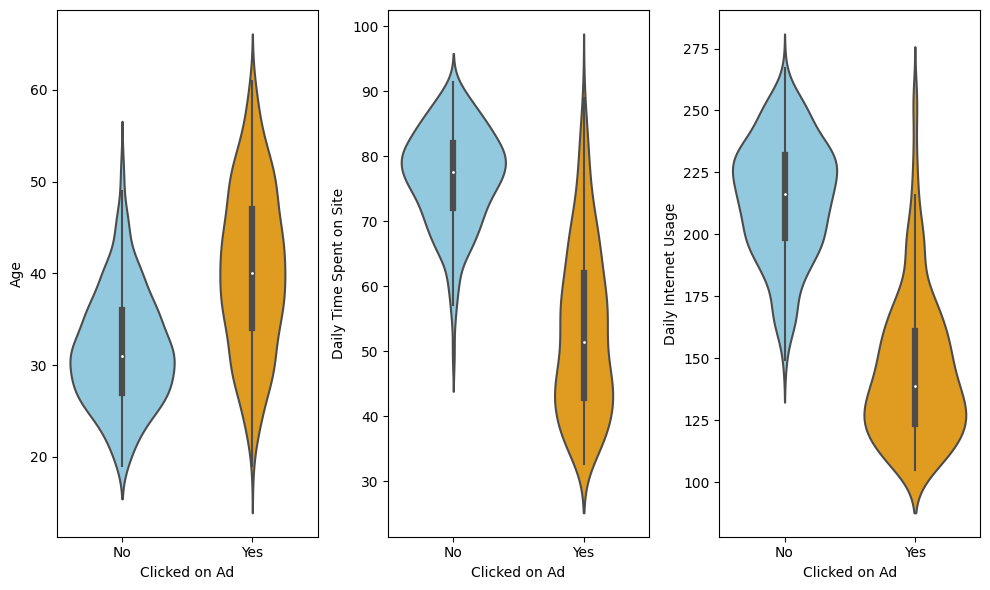

In [61]:
feats_plotting('violin')

- **Feature Age vs Clicked on Ad**: The number of customers who did not click on ads is highest at the age of 30, higher than customers who clicked on ads at the age of 40.
- **Feature Daily Time Spent on Site vs Clicked on Ad**: The longer time a customer spends on the site, the higher the likelihood that the customer did not click on ads.
- **Feature Daily Internet Usage vs Clicked on Ad**: The lower the internet usage by the customer, the higher the likelihood that the customer clicked on ads; conversely, the higher the internet usage, the higher the likelihood that the customer did not click on ads. Therefore, the number of 'Clicked Ads' (both Yes & No) in Daily Internet Usage has equal frequency.

###Multivariate Analysis

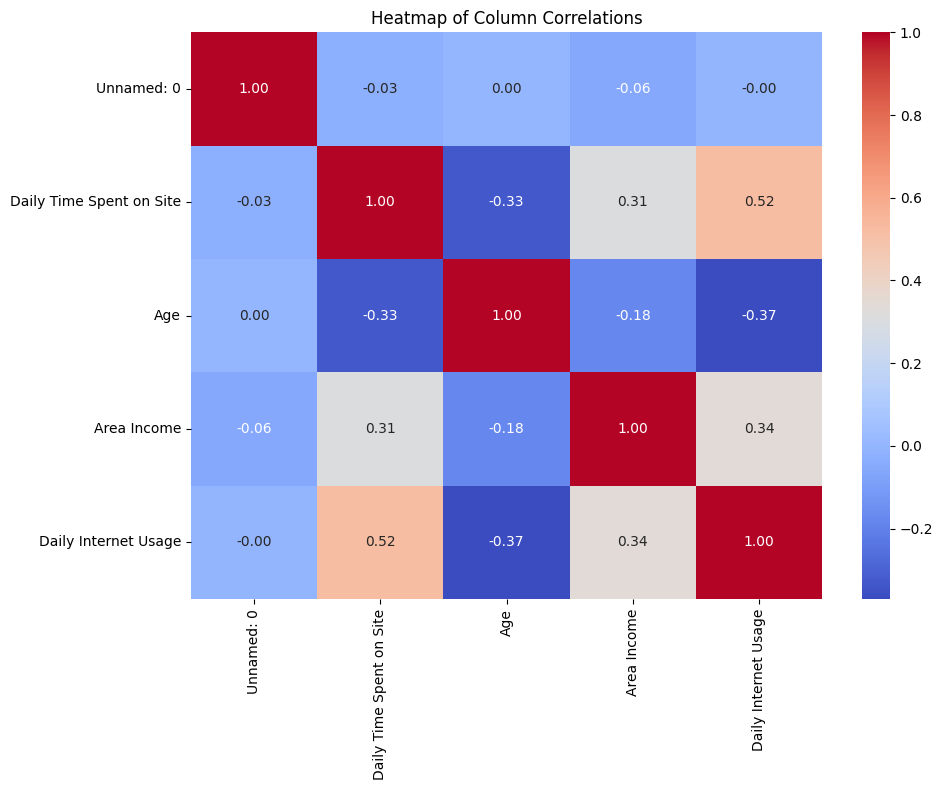

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap of Column Correlations')
plt.tight_layout()
plt.show()

- The features with high correlation are Daily Time Spent on Site, Daily Internet Usage, and Area Income.
- The feature with low correlation is Age.

##Data Preprocessing

In [63]:
df1 = df.copy()

# Handling Missing Value
df1['Daily Time Spent on Site'].fillna(df1['Daily Time Spent on Site'].median(),inplace=True)
df1['Daily Internet Usage'].fillna(df1['Daily Internet Usage'].median(),inplace=True)
df1['Area Income'].fillna(df1['Area Income'].mean(),inplace=True)
df1['Male'].fillna('perempuan', inplace=True)

# Change Data Type of Timestamp
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# Features Extraction
df1['Year'] = df1['Timestamp'].dt.year
df1['Month'] = df1['Timestamp'].dt.month
df1['Week'] = df1['Timestamp'].dt.isocalendar().week
df1['Day'] = df1['Timestamp'].dt.day

# Feature Removal
df2 = df1.drop(columns=['Unnamed: 0','Area Income','Male','city','province','category','Timestamp']).copy()

df2

,Daily Time Spent on Site,Age,Daily Internet Usage,Clicked on Ad,Year,Month,Week,Day
0,68.95,35,256.09,No,2016,3,12,27
1,80.23,31,193.77,No,2016,4,14,4
2,69.47,26,236.50,No,2016,3,10,13
3,74.15,29,245.89,No,2016,1,1,10
4,68.37,35,225.58,No,2016,6,22,3
...,...,...,...,...,...,...,...,...
995,72.97,30,208.58,Yes,2016,2,6,11
996,51.30,45,134.42,Yes,2016,4,16,22
997,68.11,51,120.37,Yes,2016,2,5,1
998,55.55,19,187.95,No,2016,3,12,24


In [64]:
df2.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Daily Internet Usage        0
Clicked on Ad               0
Year                        0
Month                       0
Week                        0
Day                         0
dtype: int64

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Daily Internet Usage      1000 non-null   float64
 3   Clicked on Ad             1000 non-null   object 
 4   Year                      1000 non-null   int64  
 5   Month                     1000 non-null   int64  
 6   Week                      1000 non-null   UInt32 
 7   Day                       1000 non-null   int64  
dtypes: UInt32(1), float64(2), int64(4), object(1)
memory usage: 59.7+ KB


In [66]:
# Feature Ecoding
le=LabelEncoder()
df2['Clicked on Ad'] = le.fit_transform(df2['Clicked on Ad'])
df2

,Daily Time Spent on Site,Age,Daily Internet Usage,Clicked on Ad,Year,Month,Week,Day
0,68.95,35,256.09,0,2016,3,12,27
1,80.23,31,193.77,0,2016,4,14,4
2,69.47,26,236.50,0,2016,3,10,13
3,74.15,29,245.89,0,2016,1,1,10
4,68.37,35,225.58,0,2016,6,22,3
...,...,...,...,...,...,...,...,...
995,72.97,30,208.58,1,2016,2,6,11
996,51.30,45,134.42,1,2016,4,16,22
997,68.11,51,120.37,1,2016,2,5,1
998,55.55,19,187.95,0,2016,3,12,24


In [67]:
# Normalization Data
minmax = MinMaxScaler()

df_st = minmax.fit_transform(df2)
df_st = pd.DataFrame(df_st, columns=df2.columns)

In [68]:
df_st.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,0.550244,0.267642,0.0,0.322030,0.603604,0.777707,1.0
Age,1000.0,0.404976,0.209180,0.0,0.238095,0.380952,0.547619,1.0
Daily Internet Usage,1000.0,0.463011,0.268932,0.0,0.211043,0.479998,0.699670,1.0
Clicked on Ad,1000.0,0.500000,0.500250,0.0,0.000000,0.500000,1.000000,1.0
Year,1000.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Month,1000.0,0.469500,0.321162,0.0,0.166667,0.500000,0.666667,1.0
Week,1000.0,0.277250,0.186792,0.0,0.134615,0.269231,0.403846,1.0
Day,1000.0,0.482800,0.291136,0.0,0.233333,0.466667,0.733333,1.0


In [69]:
# Split Data
X = df_st.drop('Clicked on Ad', axis=1)
y = df_st['Clicked on Ad']

##Data Modeling

In [70]:
# Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)

# Check number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 800
The number of records in the test dataset is 200


In [71]:
# Modeling
def eval_classification(model):
    print("Model:", model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC: %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
models = [logreg, dt, rf, knn, gbc]
for model in models:
    eval_classification(model)
    print(("--") * 50)

Model: LogisticRegression
Accuracy (Test Set): 0.97
Precision (Test Set): 0.99
Recall (Test Set): 0.95
F1-Score (Test Set): 0.97
AUC: 0.99
----------------------------------------------------------------------------------------------------
Model: DecisionTreeClassifier
Accuracy (Test Set): 0.94
Precision (Test Set): 0.97
Recall (Test Set): 0.91
F1-Score (Test Set): 0.94
AUC: 0.94
----------------------------------------------------------------------------------------------------
Model: RandomForestClassifier
Accuracy (Test Set): 0.96
Precision (Test Set): 0.98
Recall (Test Set): 0.95
F1-Score (Test Set): 0.96
AUC: 0.99
----------------------------------------------------------------------------------------------------
Model: KNeighborsClassifier
Accuracy (Test Set): 0.97
Precision (Test Set): 0.99
Recall (Test Set): 0.95
F1-Score (Test Set): 0.97
AUC: 0.98
----------------------------------------------------------------------------------------------------
Model: GradientBoostingClassif

Based on the modeling results provided, 2 best models to be selected for Hyperparameter Tuning are:
- Logistic Regression: This model showcased exceptional performance across all evaluation metrics. Boasting a high accuracy (0.97) and precision (0.99) to minimize false positives, it stands out as a robust choice.
- K-Nearest Neighbors Classifier: This model also delivered outstanding results. Apart from its high accuracy (0.97) and precision (0.99), K-Nearest Neighbors is computationally efficient and often provides a good balance between performance and speed.

In [72]:
# Hyperparameter Tuning - LogisticRegression
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.001, 0.1, 1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs_lr = GridSearchCV(logreg, hyperparameters, scoring='accuracy', cv=2)
rs_lr.fit(X_train, y_train)
eval_classification(rs_lr)

# print best parameter after tuning
print("Best Parameter:",rs_lr.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best Estimator:",rs_lr.best_estimator_)

Model: GridSearchCV
Accuracy (Test Set): 0.96
Precision (Test Set): 1.00
Recall (Test Set): 0.93
F1-Score (Test Set): 0.96
AUC: 0.99
Best Parameter: {'C': 0.001, 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=0.001)


In [73]:
# Hyperparameter tuning - K-Nearest Neighbors Classifier
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

rs_knn = GridSearchCV(knn, hyperparameters, scoring='precision', cv=5)
rs_knn.fit(X_train, y_train)
eval_classification(rs_knn)

# print best parameter after tuning
print("Best Parameter:",rs_knn.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best Estimator:",rs_knn.best_estimator_)

Model: GridSearchCV
Accuracy (Test Set): 0.95
Precision (Test Set): 1.00
Recall (Test Set): 0.90
F1-Score (Test Set): 0.95
AUC: 0.98
Best Parameter: {'algorithm': 'auto', 'n_neighbors': 14, 'p': 1}
Best Estimator: KNeighborsClassifier(n_neighbors=14, p=1)


Based on the 2 hyperparameters results, the model that performed the best is the LogisticRegressions because has a slightly higher accuracy and recall.

In [74]:
# Features Importances
def feature_importance(model):
    feat_importances = pd.Series(abs(model.coef_[0]), index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', color='skyblue', figsize=(10, 5))
    ax.invert_yaxis()

    plt.xlabel('Coefficient Magnitude', fontsize=13)
    plt.ylabel('Feature', fontsize=13)
    plt.title('Feature Importance', fontsize=13)

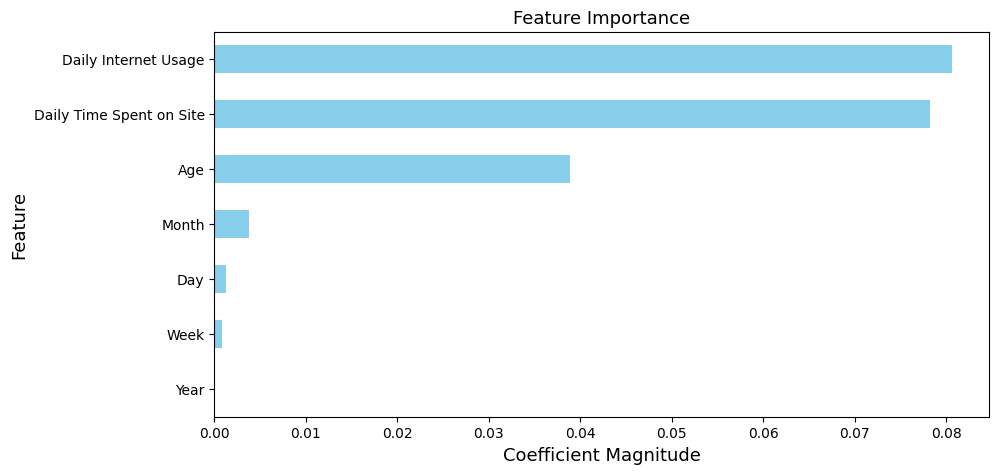

In [75]:
best_lr=rs_lr.best_estimator_
feature_importance(best_lr)

In [76]:
coefficients = pd.Series(best_lr.coef_[0], index=X.columns)

# Get the top 2 most important features based on their coefficients
top_features = coefficients.abs().nlargest(2).index

# Print the two most important features and their coefficients
print("Two most important features:")
print(top_features)
print("Coefficients for top features:")
print(coefficients[top_features])

Two most important features:
Index(['Daily Internet Usage', 'Daily Time Spent on Site'], dtype='object')
Coefficients for top features:
Daily Internet Usage       -0.080685
Daily Time Spent on Site   -0.078246
dtype: float64


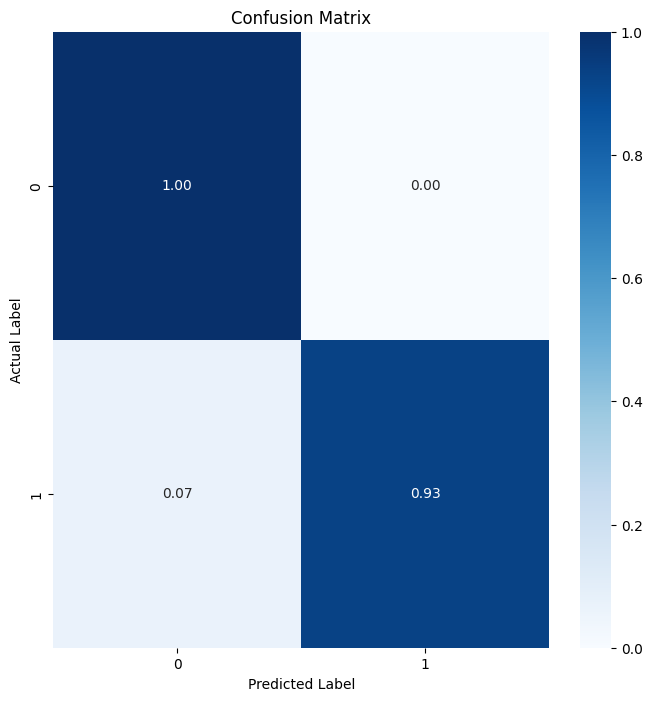

In [77]:
def plot_confusion_matrix(y_true, y_pred, classes): #y_true = actual event, y_pred = prediction event
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalize (make value of matrix to : 0 - 1)

    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

y_pred = rs_lr.predict(X_test)
plot_confusion_matrix(y_test, y_pred, ['0', '1'])

##Business Recommendation



From the results of the Logistic Regression model, the two most important features are 'Daily Internet Usage' and 'Daily Time Spent on Site'. The business recommendations are:
- **Optimize Website Engagement**: Encourage customers to spend more time on website by enhancing user experience, providing valuable content, and ensuring easy navigation.
- **Target Low Internet Usage Segments**: Identify customer segments with lower internet usage, as they are more likely to click on ads. Consider tailoring specific ad campaigns for these segments.
- **Segmented Ad Strategies**: Since Daily Internet Usage and Daily Time Spent on Site have nearly equal influence, consider segmenting ad strategies based on these factors. For customers with high internet usage and low time spent on the site, focus on attention-grabbing ads. For customers with low internet usage and high time spent on the site, invest in engaging content and interactive ad formats.